# Selección de Modelos, Underfitting, and Overfitting
Como científicos de aprendizaje automático, nuestro objetivo es descubrir *patrones*. Pero, ¿cómo podemos estar seguros de que realmente hemos descubierto un patrón *general* y no simplemente memorizado nuestros datos?

Por ejemplo, imagine que quisiéramos buscar patrones entre los marcadores genéticos que vinculan a los pacientes con su estado de demencia, donde las etiquetas se extraen del conjunto $\{\text{demencia}, \text{deterioro cognitivo leve}, \text{saludable}\}$ 

![Imgur](https://i.imgur.com/dDq3aAi.png)

Debido a que los genes de cada persona los identifican de manera única (ignorando a los hermanos idénticos), es posible memorizar todo el conjunto de datos. No queremos que nuestro modelo diga **"¡Ese es Bob! ¡Lo recuerdo! ¡Tiene demencia!"** La razón es simple. Cuando implementemos el modelo en el futuro, encontraremos pacientes que el modelo nunca antes había visto. Nuestras predicciones solo serán útiles si nuestro modelo realmente ha descubierto un patrón *general*.

Para recapitular de manera más formal, nuestro objetivo es **descubrir patrones que capturen regularidades en la población subyacente de la que se extrajo nuestro conjunto de entrenamiento**. Si tenemos éxito en este esfuerzo, entonces podríamos evaluar con éxito el riesgo incluso para personas con las que nunca nos hemos encontrado antes. Este problema, cómo descubrir patrones que ***generalizan***, es el problema fundamental del aprendizaje automático.

El peligro es que cuando entrenamos modelos, solo accedemos a una pequeña muestra de datos. Los conjuntos de datos de imágenes públicas más grandes contienen aproximadamente un millón de imágenes. Más a menudo, debemos aprender de solo miles o decenas de miles de ejemplos de datos. En un gran sistema hospitalario, podríamos acceder a cientos de miles de registros médicos. Cuando trabajamos con muestras finitas, corremos el riesgo de descubrir asociaciones aparentes que resultan no sostenerse cuando recopilamos más datos.

El fenómeno de ajustar nuestros datos de entrenamiento más estrechamente de lo que ajustamos a la distribución subyacente se denomina ***sobreajuste***, y las técnicas utilizadas para combatir el sobreajuste se denominan ***regularización***. En las secciones anteriores, es posible que haya observado este efecto mientras experimentaba con el conjunto de datos Fashion-MNIST. Si modificó la estructura del modelo o los hiperparámetros durante el experimento, es posible que haya notado que, con suficientes neuronas, capas y épocas de entrenamiento, el modelo finalmente puede alcanzar una precisión perfecta en el conjunto de entrenamiento, incluso cuando la precisión de los datos de prueba se deteriora.

## Error de entrenamiento y error de generalización

Para discutir este fenómeno de manera más formal,
necesitamos diferenciar entre error de entrenamiento y error de generalización.

* El **error de entrenamiento** es el error de nuestro modelo calculado en el conjunto de entrenamiento. 

* El **error de generalización** es la esperanza del error de nuestro modelo si lo aplicamos a un flujo infinito de ejemplos de datos adicionales extraídos de la misma distribución de datos subyacente que nuestra muestra original. 

Problemáticamente, nunca podemos calcular exactamente el error de generalización. Eso es porque el flujo de datos infinitos es un objeto imaginario. En la práctica, debemos ***estimar*** el error de generalización aplicando nuestro modelo a un **conjunto de prueba** independiente constituido por una selección aleatoria de ejemplos de datos que fueron retenidos de nuestro conjunto de entrenamiento.

![Imgur](https://i.imgur.com/i0EsG6w.png)

Según como varíen nunestros errores de entrenamiento y generalización se pueden dar los siguientes casos.

![Imgur](https://i.imgur.com/oppI5eY.png)
![Imgur](https://i.imgur.com/Yf9W7Pr.png)

El mejor modelo será aquel que obtenga un error de generalización lo más bajo posible, aunque el error de entrenamiento no sea el mínimo. En la siguiente figura vemos que, la mayoría de las veces, minimizar el error de entrenamiento (hasta el punto de volverlo 0) siempre trae aparejado un aumento del error de generalización.

![Imgur](https://i.imgur.com/c5fAp9u.png)


## Componentes del Error de Generalización

El **error de generalización** es la esperanza del error de nuestro modelo si lo aplicamos a un flujo infinito de ejemplos de datos adicionales extraídos de la misma distribución de datos subyacente que nuestra muestra original.

Si lo expresamos matemáticamente quedaría así $E[(y-\hat{y})^2]$ donde $E[]$ representa la esperanza matemática que formaliza la idea de valor medio de un fenómeno aleatorio.

Luego, mediante un par de artilugios matemáticos podemos expresar la diferencia entre la predicción dle modelo y la realidad como la suma de 3 términos.

![Imgur](https://i.imgur.com/ts8QY7i.png)


Como el error de generalización es la esperanza de esa diferencia, es equivalente a la suma de las esperanzas de cada término. Se puede demostrar que la esperanza del tercer término es cero.

![Imgur](https://i.imgur.com/R9aTxZA.png)


Esto nos permite definir el error de generalización a partir de dos componentes principales. El primer término se llama Sesgo (o Bias en inglés) y el segundo se llama Varianza.

![Imgur](https://i.imgur.com/Q1QlaHa.png)

En resumen, el error de generalización tienen las siguientes componentes:

* **Sesgo**: la diferencia entre la predicción esperada (o promedio) de nuestro modelo y el valor correcto que estamos tratando de predecir.
* **Varianza**: variabilidad esperada (o promedio) de la predicción de un modelo. 
* **Error irreducible**: es el error introducido desde el marco elegido del problema y puede ser causado por factores como features no tenidas en cuenta o errores en la medición de los datos.

Puede resultar extraño hablar del error promedio de nuestros modelos dado que solo tenemos un modelo. Sin embargo, imagine que pudiera repetir todo el proceso de creación del modelo más de una vez: cada vez que recopilemos nuevos datos y ejecutemos un nuevo entrenamiento, estaríamos creando un nuevo modelo. Debido a la aleatoriedad en los conjuntos de datos subyacentes, los modelos resultantes tendrán una variedad de predicciones. El sesgo mide qué tan lejos en general están las predicciones de estos modelos del valor correcto y la varianza mide que tan lejos en general están cada una de las predicciones de estos modelos del valor medio de las predicciones.

![Imgur](https://i.imgur.com/2dlWfwB.png)



### Sesgo


En los modelos de machine learning el sesgo aparece por las suposiciones simplistas y erróneas hechas por un modelo para hacer que la función objetivo sea más fácil de aprender. Si la función que se desea aproximar es demasiado simple comparada con la función real, el modelo no será capaz de aprender y se producirá un underfitting. Por lo tanto, **para reducir el sesgo hay que aumentar la complejidad del modelo**.

![Imgur](https://i.imgur.com/tnGK9ni.png)

### Complejidad del modelo

Lo que constituye precisamente la complejidad del modelo es un asunto complejo. Muchos factores gobiernan si un modelo es o no más complejo que otro. Por ejemplo, un modelo con más parámetros podría considerarse más complejo. Un modelo cuyos parámetros pueden tomar una gama más amplia de valores podría ser más complejo. A menudo, con las redes neuronales, pensamos en un modelo que toma más iteraciones de entrenamiento como más complejo, y uno sujeto a *detención anticipada* (menos iteraciones de entrenamiento) como menos complejo.

![Imgur](https://i.imgur.com/EW5Garz.png)

### Varianza

En los modelos de machine learning la varianza aparece por una flexibilidad excesiva del modelo que le permite ajustarse al ruido presente en el dataset. Esta flexibilidad es consecuencia de la complejidad del modelo, por lo tanto, **para reducir la varianza hay que reducir la complejidad**.

![Imgur](https://i.imgur.com/g70f4yt.png)

### Equilibrio entre Sesgo y Varianza

Como la complejidad del modelo tiene efectos inversos sobre el sesgo y la varianza, el problema se reduce nuevamente a buscar un equilibrio entre ambos.

![Imgur](https://i.imgur.com/Qaz5eps.png)










## Underfitting or Overfitting?

When we compare the training and validation errors,
we want to be mindful of two common situations.
First, we want to watch out for cases
when our training error and validation error are both substantial
but there is a little gap between them.
If the model is unable to reduce the training error,
that could mean that our model is too simple
(i.e., insufficiently expressive)
to capture the pattern that we are trying to model.
Moreover, since the *generalization gap*
between our training and validation errors is small,
we have reason to believe that we could get away with a more complex model.
This phenomenon is known as *underfitting*.

On the other hand, as we discussed above,
we want to watch out for the cases
when our training error is significantly lower
than our validation error, indicating severe *overfitting*.
Note that overfitting is not always a bad thing.
With deep learning especially, it is well known
that the best predictive models often perform
far better on training data than on holdout data.
Ultimately, we usually care more about the validation error
than about the gap between the training and validation errors.

Whether we overfit or underfit can depend
both on the complexity of our model
and the size of the available training datasets,
two topics that we discuss below.

### Model Complexity

To illustrate some classical intuition
about overfitting and model complexity,
we give an example using polynomials.
Given training data consisting of a single feature $x$
and a corresponding real-valued label $y$,
we try to find the polynomial of degree $d$

$$\hat{y}= \sum_{i=0}^d x^i w_i$$

to estimate the labels $y$.
This is just a linear regression problem
where our features are given by the powers of $x$,
the model's weights are given by $w_i$,
and the bias is given by $w_0$ since $x^0 = 1$ for all $x$.
Since this is just a linear regression problem,
we can use the squared error as our loss function.


A higher-order polynomial function is more complex
than a lower-order polynomial function,
since the higher-order polynomial has more parameters
and the model function's selection range is wider.
Fixing the training dataset,
higher-order polynomial functions should always
achieve lower (at worst, equal) training error
relative to lower degree polynomials.
In fact, whenever the data examples each have a distinct value of $x$,
a polynomial function with degree equal to the number of data examples
can fit the training set perfectly.
We visualize the relationship between polynomial degree
and underfitting vs. overfitting in :numref:`fig_capacity_vs_error`.

![Influence of model complexity on underfitting and overfitting](../img/capacity-vs-error.svg)
:label:`fig_capacity_vs_error`

### Dataset Size

The other big consideration to bear in mind is the dataset size.
Fixing our model, the fewer samples we have in the training dataset,
the more likely (and more severely) we are to encounter overfitting.
As we increase the amount of training data,
the generalization error typically decreases.
Moreover, in general, more data never hurt.
For a fixed task and data distribution,
there is typically a relationship between model complexity and dataset size.
Given more data, we might profitably attempt to fit a more complex model.
Absent sufficient data, simpler models may be more difficult to beat.
For many tasks, deep learning only outperforms linear models
when many thousands of training examples are available.
In part, the current success of deep learning
owes to the current abundance of massive datasets
due to Internet companies, cheap storage, connected devices,
and the broad digitization of the economy.

## Polynomial Regression

We can now (**explore these concepts interactively
by fitting polynomials to data.**)


In [ ]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### Generating the Dataset

First we need data. Given $x$, we will [**use the following cubic polynomial to generate the labels**] on training and test data:

(**$$y = 5 + 1.2x - 3.4\frac{x^2}{2!} + 5.6 \frac{x^3}{3!} + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.1^2).$$**)

The noise term $\epsilon$ obeys a normal distribution
with a mean of 0 and a standard deviation of 0.1.
For optimization, we typically want to avoid
very large values of gradients or losses.
This is why the *features*
are rescaled from $x^i$ to $\frac{x^i}{i!}$.
It allows us to avoid very large values for large exponents $i$.
We will synthesize 100 samples each for the training set and test set.


In [ ]:
max_degree = 20  # Maximum degree of the polynomial
n_train, n_test = 100, 100  # Training and test dataset sizes
true_w = np.zeros(max_degree)  # Allocate lots of empty space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # `gamma(n)` = (n-1)!
# Shape of `labels`: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

Again, monomials stored in `poly_features`
are rescaled by the gamma function,
where $\Gamma(n)=(n-1)!$.
[**Take a look at the first 2 samples**] from the generated dataset.
The value 1 is technically a feature,
namely the constant feature corresponding to the bias.


In [ ]:
# Convert from NumPy ndarrays to tensors
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

In [ ]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 0.4015],
         [-0.2346]]),
 tensor([[ 1.0000e+00,  4.0154e-01,  8.0618e-02,  1.0791e-02,  1.0832e-03,
           8.6992e-05,  5.8218e-06,  3.3396e-07,  1.6762e-08,  7.4787e-10,
           3.0030e-11,  1.0962e-12,  3.6681e-14,  1.1330e-15,  3.2497e-17,
           8.6992e-19,  2.1832e-20,  5.1567e-22,  1.1504e-23,  2.4312e-25],
         [ 1.0000e+00, -2.3458e-01,  2.7513e-02, -2.1513e-03,  1.2616e-04,
          -5.9190e-06,  2.3141e-07, -7.7548e-09,  2.2739e-10, -5.9266e-12,
           1.3903e-13, -2.9647e-15,  5.7955e-17, -1.0458e-18,  1.7522e-20,
          -2.7402e-22,  4.0174e-24, -5.5435e-26,  7.2244e-28, -8.9193e-30]]),
 tensor([5.2693, 4.6050]))

### Training and Testing the Model

Let us first [**implement a function to evaluate the loss on a given dataset**].


In [ ]:
def evaluate_loss(net, data_iter, loss):  #@save
    """Evaluate the loss of a model on the given dataset."""
    metric = d2l.Accumulator(2)  # Sum of losses, no. of examples
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

Now [**define the training function**].


In [ ]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

### [**Third-Order Polynomial Function Fitting (Normal)**]

We will begin by first using a third-order polynomial function, which is the same order as that of the data generation function.
The results show that this model's training and test losses can be both effectively reduced.
The learned model parameters are also close
to the true values $w = [5, 1.2, -3.4, 5.6]$.


weight: [[ 4.999099   1.2192062 -3.377857   5.5528784]]


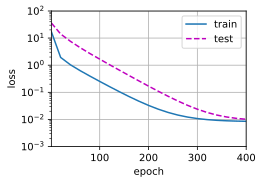

In [ ]:
# Pick the first four dimensions, i.e., 1, x, x^2/2!, x^3/3! from the
# polynomial features
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

### [**Linear Function Fitting (Underfitting)**]

Let us take another look at linear function fitting.
After the decline in early epochs,
it becomes difficult to further decrease
this model's training loss.
After the last epoch iteration has been completed,
the training loss is still high.
When used to fit nonlinear patterns
(like the third-order polynomial function here)
linear models are liable to underfit.


weight: [[3.7911081 2.5833387]]


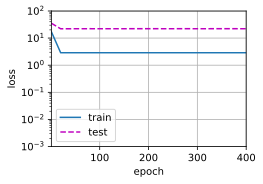

In [ ]:
# Pick the first two dimensions, i.e., 1, x, from the polynomial features
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

### [**Higher-Order Polynomial Function Fitting  (Overfitting)**]

Now let us try to train the model
using a polynomial of too high degree.
Here, there are insufficient data to learn that
the higher-degree coefficients should have values close to zero.
As a result, our overly-complex model
is so susceptible that it is being influenced
by noise in the training data.
Though the training loss can be effectively reduced,
the test loss is still much higher.
It shows that
the complex model overfits the data.


weight: [[ 5.0019913   1.2659464  -3.3324203   5.2160134  -0.31978676  1.2983036
   0.01977059  0.20886001 -0.02627637 -0.17851575 -0.16669305 -0.2156814
  -0.09898872 -0.18689805  0.05609591 -0.10168056 -0.1683235   0.22086866
  -0.16249742 -0.05473528]]


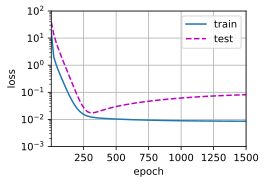

In [ ]:
# Pick all the dimensions from the polynomial features
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

In the subsequent sections, we will continue
to discuss overfitting problems
and methods for dealing with them,
such as weight decay and dropout.


## Summary

* Since the generalization error cannot be estimated based on the training error, simply minimizing the training error will not necessarily mean a reduction in the generalization error. Machine learning models need to be careful to safeguard against overfitting so as to minimize the generalization error.
* A validation set can be used for model selection, provided that it is not used too liberally.
* Underfitting means that a model is not able to reduce the training error. When training error is much lower than validation error, there is overfitting.
* We should choose an appropriately complex model and avoid using insufficient training samples.


## Exercises

1. Can you solve the polynomial regression problem exactly? Hint: use linear algebra.
1. Consider model selection for polynomials:
    1. Plot the training loss vs. model complexity (degree of the polynomial). What do you observe? What degree of polynomial do you need to reduce the training loss to 0?
    1. Plot the test loss in this case.
    1. Generate the same plot as a function of the amount of data.
1. What happens if you drop the normalization ($1/i!$) of the polynomial features $x^i$? Can you fix this in some other way?
1. Can you ever expect to see zero generalization error?


[Discussions](https://discuss.d2l.ai/t/97)
